#### Author: Chenxi Wang

# Problem 1: Linear Regression

In [361]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

import os
print os.getcwd()

/Users/sheilacwang/Documents/Study /17Fall/CS 273A/hw/hw2


In [362]:
data = np.genfromtxt("data/curve80.txt",delimiter=None)

## Question 1

In [363]:
X = data[:,0]
X = np.atleast_2d(X).T 
# code expects shape (M,N) so make sure it's 2-dimensional
Y = data[:,1] # doesn't matter for Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25

In [364]:
print "shape of Xtr:", Xtr.shape
print "shape of Xte:", Xte.shape
print "shape of Ytr:", Ytr.shape
print "shape of Yre:", Yte.shape

shape of Xtr: (60, 1)
shape of Xte: (20, 1)
shape of Ytr: (60,)
shape of Yre: (20,)


## Question 2

In [365]:
lr = ml.linear.linearRegress( Xtr, Ytr ) # create and train model
xs = np.linspace(0,10,200) # densely sample possible x-values
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix 
ys = lr.predict( xs ) # make predictions at xs

#### (a)

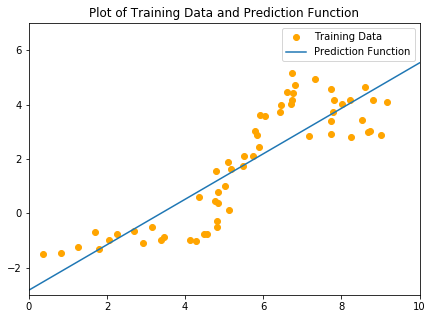

In [366]:
fig, ax = plt.subplots(1,1, figsize=(7, 5))

ax.plot(Xtr, Ytr, "o", color = "orange", label = "Training Data") 
ax.plot(xs, ys, "-", label = "Prediction Function")
ax.set_xlim(0, 10)
ax.set_ylim(-3, 7)
ax.set_title("Plot of Training Data and Prediction Function")
ax.legend()

plt.show()

#### (b)

In [367]:
print "linear regression coefficients:", lr.theta

linear regression coefficients: [[-2.82765049  0.83606916]]


The coefficients match with my plot according to the intercept and the slope.

#### (c)

In [368]:
def MSE(X, Y):
    Yhat = lr.predict(X)
    Ys = np.atleast_2d(Y).T
    e = Ys - Yhat
    j = e.T.dot(e)/X.shape[0]
    j = np.squeeze(j)
    
    return j

In [369]:
lr = ml.linear.linearRegress( Xtr, Ytr )
print MSE(Xtr, Ytr), MSE(Xte, Yte)

1.12771195561 2.24234920301


Therefore, the mean squared errors of the predictions on the training and test data are 1.12771196 and 2.2423492 respectively.

## Question 3

#### (a) Learned prediction function Plot

In [370]:
def Phi(Xtr, Xte):
    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
    XtrP,params = ml.transforms.rescale(XtrP)
    XteP,_ = ml.transforms.rescale(\
    ml.transforms.fpoly(Xte,degree,False), params)
    
    return XtrP, XteP

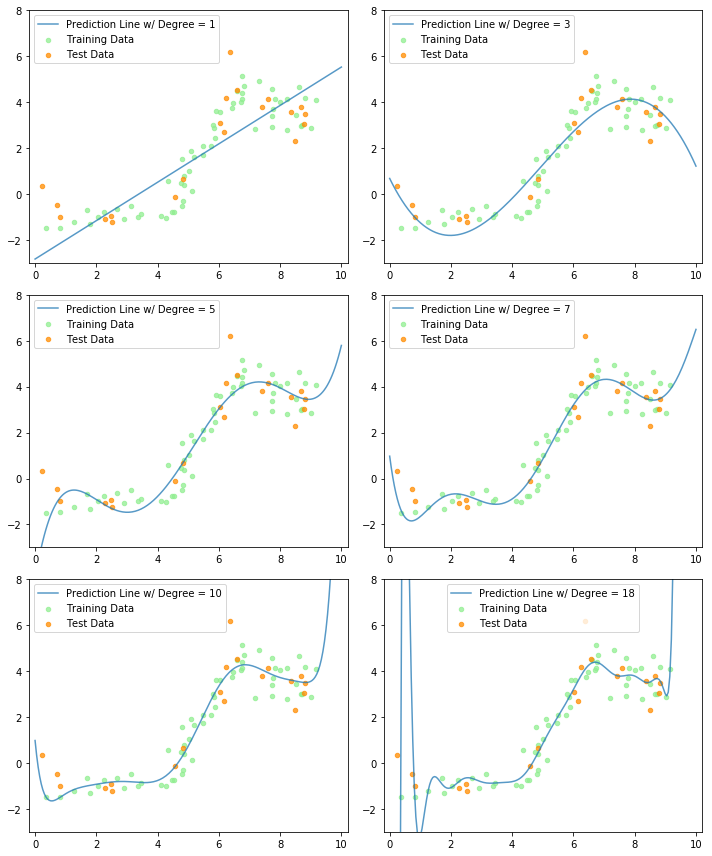

In [371]:
d = [1,3,5,7,10,18]
xs = np.linspace(0,10,200) 
xs = xs[:,np.newaxis]

fig, ax = plt.subplots(3,2, figsize=(10, 12))
ax = ax.ravel()
for i,ax in enumerate(ax):
    degree = d[i]
    lr = ml.linear.linearRegress( Phi(Xtr, Xte)[0], Ytr )  
    ys_hat = lr.predict( Phi(Xtr, xs)[1] )    
    ax.scatter(Xtr, Ytr, s=20, color='lightgreen', \
               alpha=0.75, label='Training Data')
    ax.scatter(Xte, Yte, s=20, color='darkorange', \
               alpha=0.75, label='Test Data')
    ax.plot(xs, ys_hat, "-", alpha = 0.75, \
            label = "Prediction Line w/ Degree = %s" %degree)
    ax.set_xlim(-0.2, 10.2)
    ax.set_ylim(-3, 8)
    ax.legend()
    
plt.tight_layout()
plt.show()    

#### (b) Training and Test Errors Plot

degree = 1 Training MSE: 1.12771195561 Test MSE: 2.24234920301

degree = 3 Training MSE: 0.633965206312 Test MSE: 0.861611481545

degree = 5 Training MSE: 0.404248946446 Test MSE: 1.03441902056

degree = 7 Training MSE: 0.315634673989 Test MSE: 0.650224607967

degree = 10 Training MSE: 0.298947979669 Test MSE: 0.609060074862

degree = 18 Training MSE: 0.280516820057 Test MSE: 482.281258121



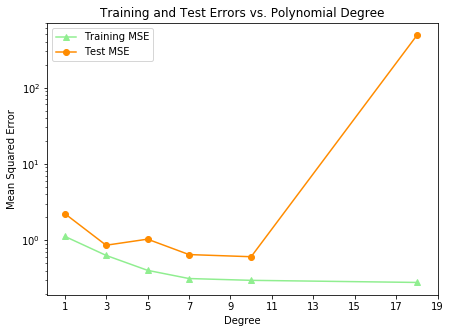

In [372]:
d = np.array([1,3,5,7,10,18])

mse_train = np.zeros(d.shape[0]);
mse_test = np.zeros(d.shape[0]);

for i,degree in enumerate(d): 
    lr = ml.linear.linearRegress(Phi(Xtr, Xte)[0], Ytr)
    mse_train[i] = MSE(Phi(Xtr, Xte)[0], Ytr)
    mse_test[i] = MSE(Phi(Xtr, Xte)[1], Yte)
    print 'degree =', degree, 'Training MSE:', \
           mse_train[i], 'Test MSE:', mse_test[i]
    print
    
    
fig, ax = plt.subplots(1,1, figsize=(7, 5))
ax.semilogy(d, mse_train, marker='^', \
            color = "lightgreen", label = "Training MSE")
ax.semilogy(d, mse_test, marker='o', \
            color = "darkorange", label = "Test MSE" )
ax.set_xlabel("Degree")
ax.set_ylabel("Mean Squared Error")
ax.set_title("Training and Test Errors vs. Polynomial Degree")
ax.set_xticks(np.arange(1, 20, 2))

ax.legend()
plt.show()

#### (c) 
I would recommend polynomial degree 10 because it has the least mean squared error on test data.

# Problem 2: Cross-validation

## Question 1

degree = 1 5-fold cross-validation error: 1.21186266296

degree = 3 5-fold cross-validation error: 0.742900575205

degree = 5 5-fold cross-validation error: 0.591070372641

degree = 7 5-fold cross-validation error: 0.733563783135

degree = 10 5-fold cross-validation error: 0.76770568594

degree = 18 5-fold cross-validation error: 216818.184601



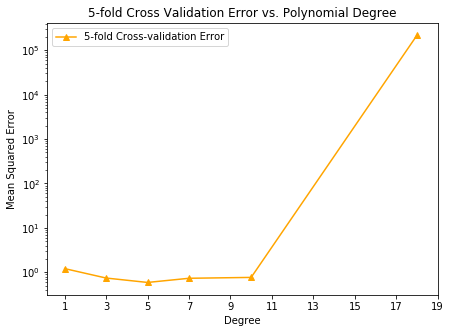

In [373]:
nFolds = 5;
d = np.array([1,3,5,7,10,18])
J = np.zeros(nFolds)
cve = np.zeros(d.shape[0])

for i,degree in enumerate(d):    
    for iFold in range(nFolds):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold)
        lr = ml.linear.linearRegress(Phi(Xti, Xvi)[0], Yti)
        J[iFold] = MSE(Phi(Xti, Xvi)[1], Yvi)
    cve[i] = np.mean(J)
    print 'degree =', degree,\
          "5-fold cross-validation error:", cve[i]
    print


fig, ax = plt.subplots(1,1, figsize=(7, 5))
ax.semilogy(d, cve, marker='^', color = "orange",\
            label = "5-fold Cross-validation Error")
ax.set_xlabel("Degree")
ax.set_ylabel("Mean Squared Error")
ax.set_title("5-fold Cross Validation Error vs. Polynomial Degree")
ax.set_xticks(np.arange(1, 20, 2))

ax.legend()
plt.show()

## Question 2

When degree $\leq$ 5, the MSE estimates from five-fold cross-validation tend to be smaller than the MSEs evaluated on the actual test data; When degree > 5, the relationship reversed, and the five-fold cross-validation error increased faster than that of the actual test data as degree increases.

## Question 3

I would recommend degree 5 because it has the least five-fold cross-validation error.

## Question 4

Fold = 2 cross-validation error: 1.17954586413

Fold = 3 cross-validation error: 0.598455501098

Fold = 4 cross-validation error: 2.21952615606

Fold = 5 cross-validation error: 0.591070372641

Fold = 6 cross-validation error: 0.596338005001

Fold = 10 cross-validation error: 0.605825690884

Fold = 12 cross-validation error: 0.644875838695

Fold = 15 cross-validation error: 0.690566966174



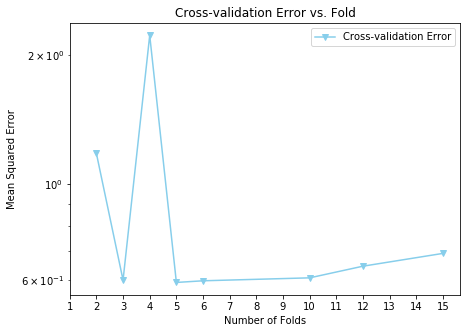

In [376]:
nFolds = np.array([2,3,4,5,6,10,12,15]);
degree = 5;
cve = np.zeros(nFolds.shape[0])

for j, iFold in enumerate(nFolds):
    J = np.zeros(iFold)
    
    for i in range(iFold):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,iFold,i)
        lr = ml.linear.linearRegress(Phi(Xti, Xvi)[0], Yti)
        J[i] = MSE(Phi(Xti, Xvi)[1], Yvi)
       
    cve[j] = np.mean(J)
    print 'Fold =', iFold,\
          "cross-validation error:", cve[j]
    print


fig, ax = plt.subplots(1,1, figsize=(7, 5))
ax.semilogy(nFolds, cve, marker='v', color = "skyblue",\
            label = "Cross-validation Error")
ax.set_xlabel("Number of Folds")
ax.set_ylabel("Mean Squared Error")
ax.set_title("Cross-validation Error vs. Fold")
ax.set_xticks(np.arange(1, 16, 1))

ax.legend()
plt.show()

The cross-validation error is relatively high at the begining when the number of folds is 2, and is very high with 4-folds validation; It is around 0.6 when the number of folds take other values less than 10, and then the error slightly increases as the number of folds continues going up. This is because small k tends to introduce under-fitting, while large k would result in over-fitting. The unusual error of 4-folds validation is probably caused by that 1/4 of our data happens to be very different from the rest.

# Statement of Collaboration

I have abided by the rules of conduct and academic honesty adoped by UC Irvine. I did not discuss the specific solutions to this homework with any person.\
\newline
Chenxi Wang\
\newline
10/18/2017